In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

In [ ]:
ban_books = pd.read_csv('../data/banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

In [ ]:
ban_books.columns

In [ ]:
ban_books.shape

In [ ]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

In [ ]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

In [ ]:
ban_books_aut_unique.shape

In [ ]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
sco_books_aut.shape

In [ ]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

In [ ]:
sco_books_aut_unique.sample(10)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

ban_unique_authors = len(set(ban_books_aut_unique['ban_author']))
sco_unique_authors = len(set(sco_books_aut_unique['sco_author']))

intersection_authors = len(set(ban_books_aut_unique['ban_author']).intersection(set(sco_books_aut_unique['sco_author'])))

venn2(subsets=(ban_unique_authors, sco_unique_authors, intersection_authors),
      set_labels=('ban_books', 'sco_books'))

plt.title('intersection of authors between ban_books and sco_books')
plt.show()

In [ ]:
ban_books_aut_unique.rename(columns={'author': 'ban_author'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco
import numpy as np

In [62]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
253,https://shakespeareandco.princeton.edu/books/d...,Lothair,"Disraeli, Benjamin",NaN,NaN,NaN,NaN,NaN,1870,Book,False,https://archive.org/details/lothair06disrgoog/...,NaN,NaN,3,2,0,1928;1940;1927,2020-08-11T23:13:15+00:00
1333,https://shakespeareandco.princeton.edu/books/m...,One of Our Grandmothers,"Mayne, Ethel Colburn",NaN,NaN,NaN,NaN,NaN,1916,Book,False,NaN,NaN,NaN,2,2,0,1930;1926,2020-04-30T19:40:17+00:00
1027,https://shakespeareandco.princeton.edu/books/f...,Dawn O'Hara: The Girl Who Laughed,"Ferber, Edna",NaN,NaN,NaN,NaN,NaN,1911,Book,False,https://archive.org/details/cu31924022410736/p...,NaN,NaN,4,4,0,1939;1925;1926,2020-06-07T20:36:46+00:00
219,https://shakespeareandco.princeton.edu/books/g...,Wives and Daughters,"Gaskell, Elizabeth",NaN,NaN,NaN,NaN,NaN,1864,Book,False,https://archive.org/details/wivesanddaughte00u...,NaN,NaN,2,2,0,1924;1926,2020-05-26T03:07:51+00:00
2547,https://shakespeareandco.princeton.edu/books/m...,Bittern Point,"MacFadyen, Virginia",NaN,NaN,NaN,NaN,NaN,1926,Book,False,NaN,NaN,NaN,1,1,0,1926,2020-06-19T01:34:23+00:00


In [63]:
ban_books = pd.read_csv('../data/banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,viaf_url,country,date_banned,source,note
58,Women in Love,"Lawrence, D. H.",http://viaf.org/viaf/95150359,USA,1922,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Work was seized but not banned
166,Going Native,"Gogarty, Oliver St. John",http://viaf.org/viaf/32004745,Ireland,1942,https://sites.nd.edu/irish-hesburgh/censorship/,NaN
202,Little Pitchers,"Glenn, Isa",http://viaf.org/viaf/23629021,USA,<NA>,https://archive.org/details/censorshipinbost01...,NaN
231,The Complete Works of Ralph Waldo Emerson: Com...,"Emerson, Ralph Waldo",http://viaf.org/viaf/27079964,NaN,<NA>,NaN,Banned from Harvard
167,Julie,"Stuart, Francis",http://viaf.org/viaf/92675428,Ireland,1939,https://sites.nd.edu/irish-hesburgh/censorship/,NaN


In [64]:
ban_books.columns

Index(['title', 'author', 'viaf_url', 'country', 'date_banned', 'source',
       'note'],
      dtype='object')

In [65]:
ban_books.shape

(251, 7)

In [66]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_20232\3768331347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Shakespeare, William"
...,...
246,"Lofting, Hugh"
247,"Dos Passos, John"
248,"Aragon, Louis"
249,"Stalin, Joseph"


In [67]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
122,"Hanley, James"
157,"Clarke, Austin"
17,"Marx, Karl"
129,"Mitchell, Margaret"
218,"Hauptmann, Gerhart"
199,"Footner, Hulbert"
47,"Cabell, James Branch"
229,"Norris, Frank"
62,"Lewis, Sinclair"
38,"Dreiser, Theodore"


In [68]:
ban_books_aut_unique.shape

(182, 1)

In [69]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
sco_books_aut.shape

(3512, 4)

In [70]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

(1453, 4)

In [71]:
sco_books_aut_unique.sample(10)

,sco_author,title,format,year
5176,"Roberts, Denys Kilham",Penguin Parade,Book,1939
2466,"Komroff, Manuel",The Grace of Lambs,Book,1925
1991,"Overton, Grant Martin",When Winter Comes to Main Street,Book,1922
4198,"Graham, Whidden",Crimson Hairs: An Erotic Mystery Story,Book,1934
1533,"Swinburne, Algernon Charles",Selections from A. C. Swinburne,Book,1919
2347,"Wren, Percival Christopher",Beau Geste,Book,1925
2199,"Millin, Sarah Gertrude",God's Stepchildren,Book,1924
3096,"Peterkin, Julia Mood",Scarlet Sister Mary,Book,1928
2422,"Sassoon, Siegfried",Poems,Book,1925
1581,"Dell, Floyd",Were You Ever a Child?,Book,1919


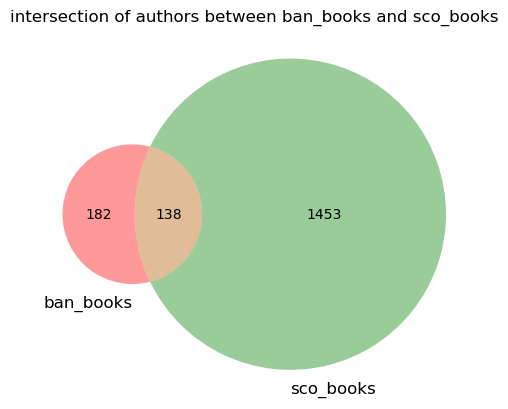

In [72]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

ban_unique_authors = len(set(ban_books_aut_unique['ban_author']))
sco_unique_authors = len(set(sco_books_aut_unique['sco_author']))

intersection_authors = len(set(ban_books_aut_unique['ban_author']).intersection(set(sco_books_aut_unique['sco_author'])))

venn2(subsets=(ban_unique_authors, sco_unique_authors, intersection_authors),
      set_labels=('ban_books', 'sco_books'))

plt.title('intersection of authors between ban_books and sco_books')
plt.show()

In [73]:
ban_books_aut_unique.rename(columns={'author': 'ban_author'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)

merged_df = pd.merge(ban_books_aut_unique, sco_books_aut_unique, how='outer', left_on='ban_author', right_on='sco_author')

no_intersection_df = merged_df[merged_df['ban_author'].isna() | merged_df['sco_author'].isna()]

no_intersection_df.reset_index(drop=True, inplace=True) # to avoid confusion later on
no_intersection_df = no_intersection_df[['sco_author','ban_author']]

print(no_intersection_df)


                sco_author        ban_author
0                      NaN      Aristophanes
1                      NaN              Ovid
2                      NaN  Apuleius, Lucius
3                      NaN     Defoe, Daniel
4                      NaN          Voltaire
...                    ...               ...
1354  Phelps, William Lyon               NaN
1355   Lawrence, Josephine               NaN
1356       Lorac, E. C. R.               NaN
1357          Marsh, Ngaio               NaN
1358       Ferneé, Herbert               NaN

[1359 rows x 2 columns]


C:\Users\dittm\AppData\Local\Temp\ipykernel_20232\887306475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut_unique.rename(columns={'author': 'ban_author'}, inplace=True)
C:\Users\dittm\AppData\Local\Temp\ipykernel_20232\887306475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)


In [83]:
no_intersection_df.sample(17)

,sco_author,ban_author
1241,"Engstrand, Stuart David",NaN
685,"Strong, Anna Louise",NaN
697,"Hopkins, R. Thurston",NaN
916,"Iles, Francis",NaN
368,"Hamsun, Knut",NaN
854,"Brooke, C. F. Tucker",NaN
404,"Wescott, Glenway",NaN
1220,"Fuller, Timothy",NaN
703,"Tate, Allen",NaN
1132,Epictetus,NaN
